# Preloading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval
from dateutil.parser import parse


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

### Load data

In [146]:
# load up data
df = pd.read_csv('preprocessed.csv', index_col='idx')
print(df.shape)
df.head()

(3756, 363)


,followers,reading_time,n_words,n_code_chunks,bold_text_count,italic_text_count,mean_image_width,mean_image_height,n_images,n_lists,n_vids,n_links,target,nuscrut,oonvuhh,oadvcfx,ajiflsn,ascurcz,gihvlpc,kabmzlv,ixhcusp,tsridyx,ynsrhsu,bdffudu,riyqmyx,bnhding,wklwjdm,afmoabz,oyrmtur,avodqaf,ycmvibl,zfivipg,kluzrbq,ycmvpni,yfxncvz,yeecjbw,lfffqhq,czxzxfc,souuvgu,olhwojd,fekoiba,hvtfoko,pwdsqlz,jbitfbs,lcahyxe,vkhhngi,fknscbw,rvobiwv,yhxjqok,tzsivqf,iazwnft,wpxvztm,raecrmd,oewmbvp,qrtwpxm,nsajxon,xyvkutx,krzpevh,lsaqduk,cyrweks,uxhqykw,whdjbpb,mkowlwu,srrgjdf,hmjqtaa,snsvaqk,orrokdv,nqpmoqs,ythvbgp,cuwawup,ykbivnv,cuivpya,jemzjtt,tkqslyu,xfnqxky,vsuznpf,aqxwopy,pbvbrnd,jridrwe,iksczqy,bjlzond,epkpmpt,qoovkrz,xscufsf,kabxocs,otnbmtf,avogdcs,dpbycuf,bglgjah,wyvnouf,rdmvuvv,uwfcpgp,cuuavtn,qmpkhlc,qctglbu,roazeqj,sjzdejv,mvhcrnl,dgorvhe,wyhjcau,frpozdf,xzsadau,gnddjuw,hbgrtol,yqfjndg,glkfvzu,jopzest,jgwjbil,mbzfuqk,csalkpx,jnczmat,gpbsdlm,sxvcqoc,ggkyjab,gqzdhyn,hblfubg,ysfdfvz,ocjqzon,phteihx,ssmezsn,bpfvyej,nlxmpiv,yvoqtsm,euadnjr,bueqajs,anyglss,knirgen,ejfnemp,sfzflko,uymfxjt,coqchov,gczvdoz,kqjcxyt,feudlpq,lhqyelz,thpekxk,cjvrwnu,uqhpmwg,ungbgqg,ywwhecs,oakwdun,ylazsxc,uhbtxbl,ynotqdf,btmqkwg,nsoncnj,ymxssoy,uffpmvb,gbglwho,sezumpm,tpalvnm,jfgrrac,munizlr,dzhdfyu,zgrnqdn,rsssenj,ohmwwvb,mmwntik,owllrny,dxrubtb,ravhrss,wswsqxb,lzfhuvm,dzcewkv,gvqkgvg,rpwthmu,oukhrjb,miobrof,iqbcabb,esxhheg,knuamrr,gihhvux,twwngex,tnyeuyy,bjsxhwb,crsrkji,xhvhprw,npliutc,plbibhs,agcjghy,aobczja,dhawsto,vckfymr,itrdhvm,hcbjgjc,zmerhsu,lfdclsn,mmenjqp,lnrgkci,bpcszvq,mjswtbo,nnlwmxg,slifspu,czblcxq,mzcsqut,ybvvekd,pcqmcvh,jgafhbx,wsefixe,bdjhnwc,xgkzohf,lwiifhw,rzwvtym,peerijl,gxbqsvy,cdwatgm,mvdvxwt,misawgk,wmpfgbf,gvvduya,khyzgbi,hvizifz,hlogbzg,klxmddm,taiolhd,tbnlbof,zllzsow,morgehy,gihxqhd,knfbnsi,seagavy,dxwqqya,ihtfvwi,ojebxas,tgqbmiu,rwekfkr,bussgyz,plcezam,gkzuvqg,ythlyci,xzftkhp,nkeftrc,mdcwrrk,rtwfgbx,uckezzl,nttzyvh,zmlhfpo,wfyxqnb,eihywrp,wftjngd,seiprxy,icdqdas,wkpmklo,hkadaav,rcbkmjn,zpoiduv,ucjxvzg,yngqkeu,cicwcad,bztsrhb,sbsomwu,ebosxfo,obamyft,jrzajws,icaqkaf,qterfoq,myvursc,vfxwnku,sytpmdg,jbnzumj,wcfbioy,ldfklyd,jthgauh,xqvnqnw,uwuinga,qrptnnd,pdkehwp,tnswweq,evigesc,bfindxr,ldmmzhn,hdyajvv,gnakffu,vqeepxb,pdwhfwy,frzclhu,elkbazj,weuahnx,ozrexux,mbuvazo,fqrpzqw,sjwkzqi,hlitrnh,aygjsto,vmmqiyx,mcdazyv,rmtytqy,ycgofpy,jwjjymo,zzocbhm,fuxvdqc,oeqpgqi,mxzhdmg,bxomazi,rucicca,leucdmr,wurxsui,xddazhb,gxcbwbk,frwabbu,rclokqd,hnkfdud,ahecaxp,nymmurb,ocoaoxx,yvhavwm,cefjhoa,kjymdpz,jylkomw,rncigks,oqcbsyc,pfzwata,ffxdjat,author_mean_target,publication_mean_target,title_char_len,title_token_len,day,month,year,winter,summer,spring,fall,language_af,language_ca,language_cy,language_da,language_de,language_en,language_es,language_fi,language_fr,language_id,language_it,language_ja,language_ko,language_lv,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_sw,language_th,language_tl,language_tr,language_vi,language_zh-cn,language_zh-tw,analytic_objective,analytic_subjective,polarity_neutral,polarity_positive,emotion_anger/irritation,emotion_contempt/reluctance,emotion_expectation/interest,emotion_joy/calmness,emotion_no emotion,emotion_surprise/amazement,emotion_trust/acceptance
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3700.0,23.0,4892.0,0.0,35.0,1.0,1150.0,426.0,30.0,3.0,0.0,14.0,8300.0,0.000221,-0.000599,0.000238,0.001169,-0.000807,-0.000755,0.001899,0.002649,-0.000693,0.000246,-0.000901,-0.001332,-0.001710,-9.706885e-04,-0.001933,-0.001489,0.000845,-0.001310,0.001140,0.000209,0.000790,-0.001138,-0.000681,-0.000601,0.001746,-0.000040,-0.000078,0.000192,-0.002087,-0.002155,0.001056,0

In [10]:
embeddings_cols = df.columns[df.columns.get_loc('target')+1:df.columns.get_loc('author_mean_target')]

In [5]:
df.describe()

,followers,reading_time,n_words,n_code_chunks,bold_text_count,italic_text_count,mean_image_width,mean_image_height,n_images,n_lists,n_vids,n_links,target,nuscrut,oonvuhh,oadvcfx,ajiflsn,ascurcz,gihvlpc,kabmzlv,ixhcusp,tsridyx,ynsrhsu,bdffudu,riyqmyx,bnhding,wklwjdm,afmoabz,oyrmtur,avodqaf,ycmvibl,zfivipg,kluzrbq,ycmvpni,yfxncvz,yeecjbw,lfffqhq,czxzxfc,souuvgu,olhwojd,fekoiba,hvtfoko,pwdsqlz,jbitfbs,lcahyxe,vkhhngi,fknscbw,rvobiwv,yhxjqok,tzsivqf,iazwnft,wpxvztm,raecrmd,oewmbvp,qrtwpxm,nsajxon,xyvkutx,krzpevh,lsaqduk,cyrweks,uxhqykw,whdjbpb,mkowlwu,srrgjdf,hmjqtaa,snsvaqk,orrokdv,nqpmoqs,ythvbgp,cuwawup,ykbivnv,cuivpya,jemzjtt,tkqslyu,xfnqxky,vsuznpf,aqxwopy,pbvbrnd,jridrwe,iksczqy,bjlzond,epkpmpt,qoovkrz,xscufsf,kabxocs,otnbmtf,avogdcs,dpbycuf,bglgjah,wyvnouf,rdmvuvv,uwfcpgp,cuuavtn,qmpkhlc,qctglbu,roazeqj,sjzdejv,mvhcrnl,dgorvhe,wyhjcau,frpozdf,xzsadau,gnddjuw,hbgrtol,yqfjndg,glkfvzu,jopzest,jgwjbil,mbzfuqk,csalkpx,jnczmat,gpbsdlm,sxvcqoc,ggkyjab,gqzdhyn,hblfubg,ysfdfvz,ocjqzon,phteihx,ssmezsn,bpfvyej,nlxmpiv,yvoqtsm,euadnjr,bueqajs,anyglss,knirgen,ejfnemp,sfzflko,uymfxjt,coqchov,gczvdoz,kqjcxyt,feudlpq,lhqyelz,thpekxk,cjvrwnu,uqhpmwg,ungbgqg,ywwhecs,oakwdun,ylazsxc,uhbtxbl,ynotqdf,btmqkwg,nsoncnj,ymxssoy,uffpmvb,gbglwho,sezumpm,tpalvnm,jfgrrac,munizlr,dzhdfyu,zgrnqdn,rsssenj,ohmwwvb,mmwntik,owllrny,dxrubtb,ravhrss,wswsqxb,lzfhuvm,dzcewkv,gvqkgvg,rpwthmu,oukhrjb,miobrof,iqbcabb,esxhheg,knuamrr,gihhvux,twwngex,tnyeuyy,bjsxhwb,crsrkji,xhvhprw,npliutc,plbibhs,agcjghy,aobczja,dhawsto,vckfymr,itrdhvm,hcbjgjc,zmerhsu,lfdclsn,mmenjqp,lnrgkci,bpcszvq,mjswtbo,nnlwmxg,slifspu,czblcxq,mzcsqut,ybvvekd,pcqmcvh,jgafhbx,wsefixe,bdjhnwc,xgkzohf,lwiifhw,rzwvtym,peerijl,gxbqsvy,cdwatgm,mvdvxwt,misawgk,wmpfgbf,gvvduya,khyzgbi,hvizifz,hlogbzg,klxmddm,taiolhd,tbnlbof,zllzsow,morgehy,gihxqhd,knfbnsi,seagavy,dxwqqya,ihtfvwi,ojebxas,tgqbmiu,rwekfkr,bussgyz,plcezam,gkzuvqg,ythlyci,xzftkhp,nkeftrc,mdcwrrk,rtwfgbx,uckezzl,nttzyvh,zmlhfpo,wfyxqnb,eihywrp,wftjngd,seiprxy,icdqdas,wkpmklo,hkadaav,rcbkmjn,zpoiduv,ucjxvzg,yngqkeu,cicwcad,bztsrhb,sbsomwu,ebosxfo,obamyft,jrzajws,icaqkaf,qterfoq,myvursc,vfxwnku,sytpmdg,jbnzumj,wcfbioy,ldfklyd,jthgauh,xqvnqnw,uwuinga,qrptnnd,pdkehwp,tnswweq,evigesc,bfindxr,ldmmzhn,hdyajvv,gnakffu,vqeepxb,pdwhfwy,frzclhu,elkbazj,weuahnx,ozrexux,mbuvazo,fqrpzqw,sjwkzqi,hlitrnh,aygjsto,vmmqiyx,mcdazyv,rmtytqy,ycgofpy,jwjjymo,zzocbhm,fuxvdqc,oeqpgqi,mxzhdmg,bxomazi,rucicca,leucdmr,wurxsui,xddazhb,gxcbwbk,frwabbu,rclokqd,hnkfdud,ahecaxp,nymmurb,ocoaoxx,yvhavwm,cefjhoa,kjymdpz,jylkomw,rncigks,oqcbsyc,pfzwata,ffxdjat,author_mean_target,publication_mean_target,title_char_len,title_token_len,day,month,year,winter,summer,spring,fall,language_af,language_ca,language_cy,language_da,language_de,language_en,language_es,language_fi,language_fr,language_id,language_it,language_ja,language_ko,language_lv,language_nl,language_no,language_pl,language_pt,language_ro,language_ru,language_sv,language_sw,language_th,language_tl,language_tr,language_vi,language_zh-cn,language_zh-tw,analytic_objective,analytic_subjective,polarity_neutral,polarity_positive,emotion_anger/irritation,emotion_contempt/reluctance,emotion_expectation/interest,emotion_joy/calmness,emotion_no emotion,emotion_surprise/amazement,emotion_trust/acceptance
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,375

# Cleaning

In [23]:
# df.drop(, axis=1, inplace=True)

#### Dropping rows

(14425, 21)

# Visualizing claps

Number of claps is highly skewed.

In [12]:
from scipy.stats import skew
skew(df['target'])

8.838661019891335

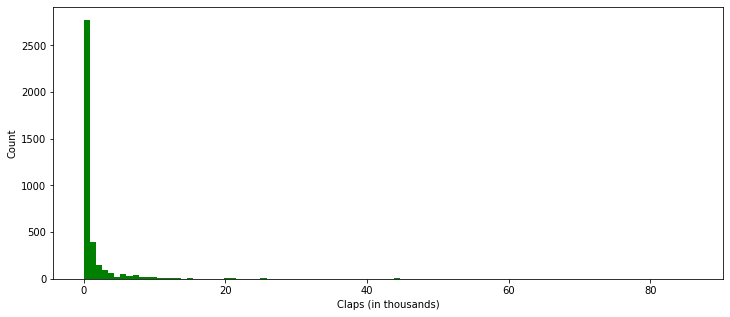

In [14]:
plt.figure(figsize=(12,5))
plt.hist(df['target']/1000,color='green', bins = 100);
plt.ylabel('Count');
plt.xlabel('Claps (in thousands)');
# plt.savefig('img/clap_dist.png', bbox_inches='tight');

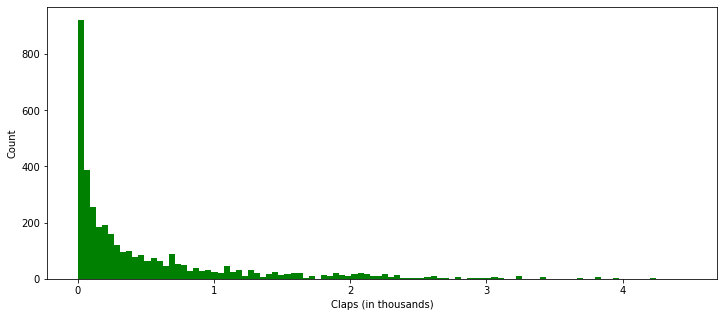

In [16]:
plt.figure(figsize=(12,5))
plt.hist(np.log(df['target']/1000+1),color='green', bins = 100);
plt.ylabel('Count');
plt.xlabel('Claps (in thousands)');
# plt.savefig('img/clap_dist.png', bbox_inches='tight');

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


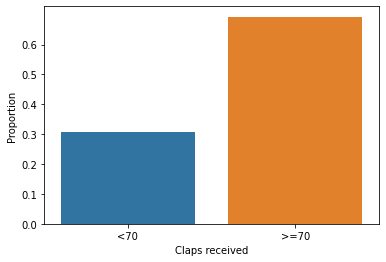

In [21]:
over_10_claps = [1 if claps > 70 else 0 for claps in df['target']]
deciles = np.arange(0, len(df)+1, len(df)/10);

sns.countplot(over_10_claps)
plt.yticks(deciles[:7], np.round(deciles[:7]/len(df['target']),1));
plt.xlabel('Claps received');
plt.ylabel('Proportion');
# plt.title('~45% of articles received under 70 claps')
locs, labels = plt.xticks();
plt.xticks(locs, labels=['<70', '>=70']);

In [31]:
df['n_claps'].describe()

count    14424.000000
mean       226.216237
std       1082.571020
min          0.000000
25%          1.000000
50%         18.000000
75%        121.000000
max      50000.000000
Name: n_claps, dtype: float64

In [24]:
from scipy.stats import iqr
121 + 1.5*iqr(df['target'])

1463.125

# Create basic features

In [25]:
# # date features  
# df['date'] = df['date'].map(to_dt)
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['day_of_week'] = df['date'].dt.dayofweek

# # extract season from date
# season_dict = {
#     1: 'winter',
#     2: 'winter',
#     3: 'spring',
#     4: 'spring',
#     5: 'spring',
#     6: 'summer',
#     7: 'summer',
#     8: 'summer',
#     9: 'fall',
#     10: 'fall',
#     11: 'fall',
#     12: 'winter'
# }
# result_data['season'] = result_data['month'].map(lambda x: season_dict[x])
# result_data['winter'] = [1 if season=='winter' else 0 for season in result_data['season']]
# result_data['summer'] = [1 if season=='summer' else 0 for season in result_data['season']]
# result_data['spring'] = [1 if season=='spring' else 0 for season in result_data['season']]

In [26]:
# features
df.columns

Index(['followers', 'reading_time', 'n_words', 'n_code_chunks',
       'bold_text_count', 'italic_text_count', 'mean_image_width',
       'mean_image_height', 'n_images', 'n_lists',
       ...
       'analytic_subjective', 'polarity_neutral', 'polarity_positive',
       'emotion_anger/irritation', 'emotion_contempt/reluctance',
       'emotion_expectation/interest', 'emotion_joy/calmness',
       'emotion_no emotion', 'emotion_surprise/amazement',
       'emotion_trust/acceptance'],
      dtype='object', length=363)

# Split the data

Train-test split

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=4)

### Plots

In [47]:
X_train['reading_time']

idx
1154    12.0
3626     8.0
3716     3.0
2693     2.0
3127     1.0
        ... 
1921    13.0
709      5.0
2487    15.0
174      7.0
1146     8.0
Name: reading_time, Length: 3004, dtype: float64

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading_time', ylabel='target'>

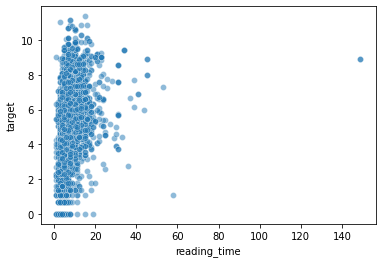

In [65]:
sns.scatterplot(X_train['reading_time'], np.log(y_train), alpha=.5)

# Baseline model 

In [133]:
X_train = X_train.drop(columns=embeddings_cols)

In [130]:
X_train = X_train.rename(columns={'language_zh-cn': 'language_zh_cn',
                                'language_zh-tw': 'language_zh_tw'})

In [136]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

def build_formula(response, features):
    return f'{response} ~ ' + (' + ').join(features) 

def ols_summary(X_train, y_train, scale_X=True, cat_features = ['day', 'month', 'year']):
    """
    Builds OLS model and prints summary based on X_train and y_train. 
    
    Arguments
    ---------
    X_train: data
    y_train: target; pass in transformed target if non-normal
    scale_X: whether to scale X data
    cat_features: features to ignore
    """
    # combine data for StatsModels
    data_sm = pd.concat([y_train, X_train], axis=1)
    
    # scale data
    scaler = StandardScaler()
    numeric_features = set(data_sm.select_dtypes('number').columns)
    # print(numeric_features)
    features_to_scale = list(numeric_features - set(cat_features))
    if scale_X:
        for feature in features_to_scale:
            print(feature)
            print(data_sm[feature])
            check = scaler.fit_transform(data_sm[feature])

        # data_sm[features_to_scale] = scaler.fit_transform(data_sm[features_to_scale])
    # final model features
    model_features = features_to_scale
    # print(model_features
    model_features.remove('target')
    print('calmness' in model_features)
    # run OLS regression
    formula = build_formula('target', model_features)
    print(formula)
    mod = smf.ols(formula, data_sm)
    res = mod.fit()
    print(res.summary())
    
    return mod

Notice: condition number is much higher when I don't scale X.

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log(claps)')

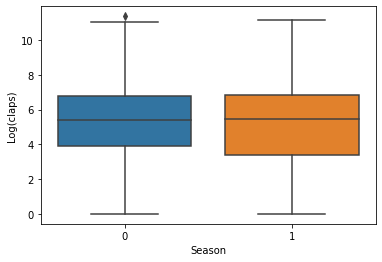

In [115]:
sns.boxplot(X_train['fall'], log(y_train))
plt.xlabel('Season')
plt.ylabel('Log(claps)')

## Pictures

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


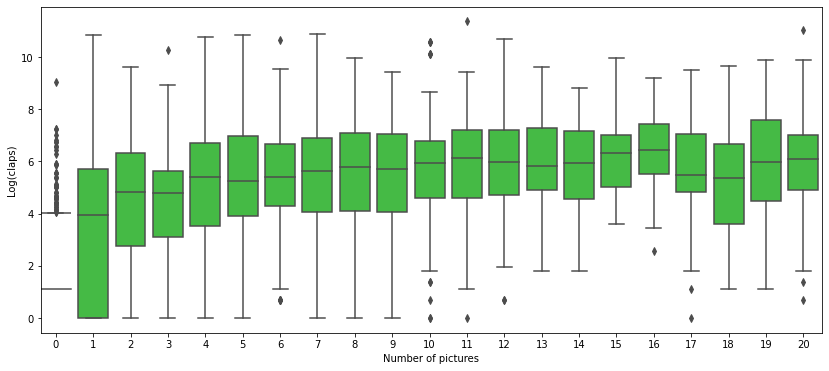

In [119]:
plt.figure(figsize=(14,6))
sns.boxplot(X_train['n_images'], log(y_train), color='limegreen');
plt.xlim(-.4,20.5);
plt.xlabel('Number of pictures');
plt.xticks(list(range(21)), list(range(21)));
plt.ylabel('Log(claps)');
# plt.savefig('img/n_pics.png', bbox_inches='tight');

Include photos! Aim to have at least two. Past six, you get diminishing returns.

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


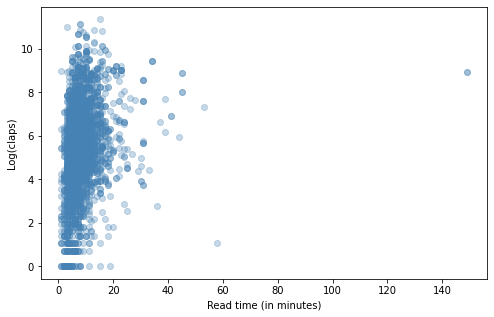

In [120]:
plt.figure(figsize=(8,5))
sns.regplot(X_train['reading_time'], log(y_train),
           scatter_kws={'alpha':0.3,'color':'steelblue'}, color='red');
plt.xlabel('Read time (in minutes)');
plt.ylabel('Log(claps)');
# plt.savefig('img/read_time.png', bbox_inches='tight');

# Categorical features

In [143]:
X_train.columns

Index(['followers', 'reading_time', 'n_words', 'n_code_chunks',
       'bold_text_count', 'italic_text_count', 'mean_image_width',
       'mean_image_height', 'n_images', 'n_lists', 'n_vids', 'n_links',
       'author_mean_target', 'publication_mean_target', 'title_char_len',
       'title_token_len', 'day', 'month', 'year', 'winter', 'summer', 'spring',
       'fall', 'language_af', 'language_ca', 'language_cy', 'language_da',
       'language_de', 'language_en', 'language_es', 'language_fi',
       'language_fr', 'language_id', 'language_it', 'language_ja',
       'language_ko', 'language_lv', 'language_nl', 'language_no',
       'language_pl', 'language_pt', 'language_ro', 'language_ru',
       'language_sv', 'language_sw', 'language_th', 'language_tl',
       'language_tr', 'language_vi', 'language_zh_cn', 'language_zh_tw',
       'analytic_objective', 'analytic_subjective', 'polarity_neutral',
       'polarity_positive', 'emotion_anger_irritation',
       'emotion_contempt_relucta

## Top publications 

C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Has code chunks')

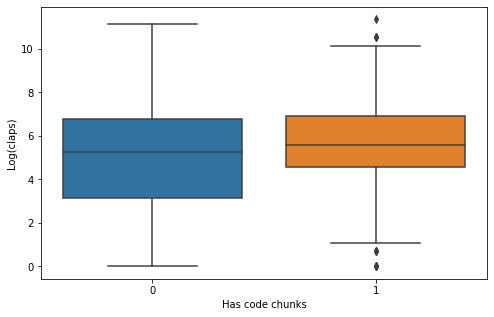

In [144]:
plt.figure(figsize=(8,5))
sns.boxplot([1 if n > 0 else 0 for n in X_train['n_code_chunks']], log(y_train))
plt.ylabel('Log(claps)')
plt.xlabel('Has code chunks')

### Sentiment score of title

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

X_train['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_train['title']]
X_test['sentiment_title'] = [analyzer.polarity_scores(title)['compound'] for title in X_test['title']]

Text(0, 0.5, 'Log(claps)')

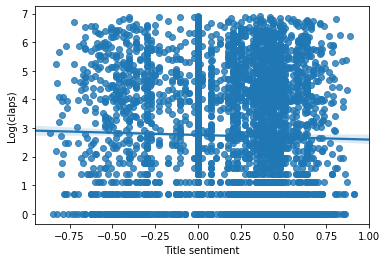

In [81]:
sns.regplot(X_train['sentiment_title'], log(y_train));
plt.xlabel('Title sentiment')
plt.ylabel('Log(claps)')

In [154]:
X_train = X_train.drop(columns=['author_mean_target'])

In [155]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [156]:
imps = model.feature_importances_

Text(0.5, 1.0, 'Влияние')

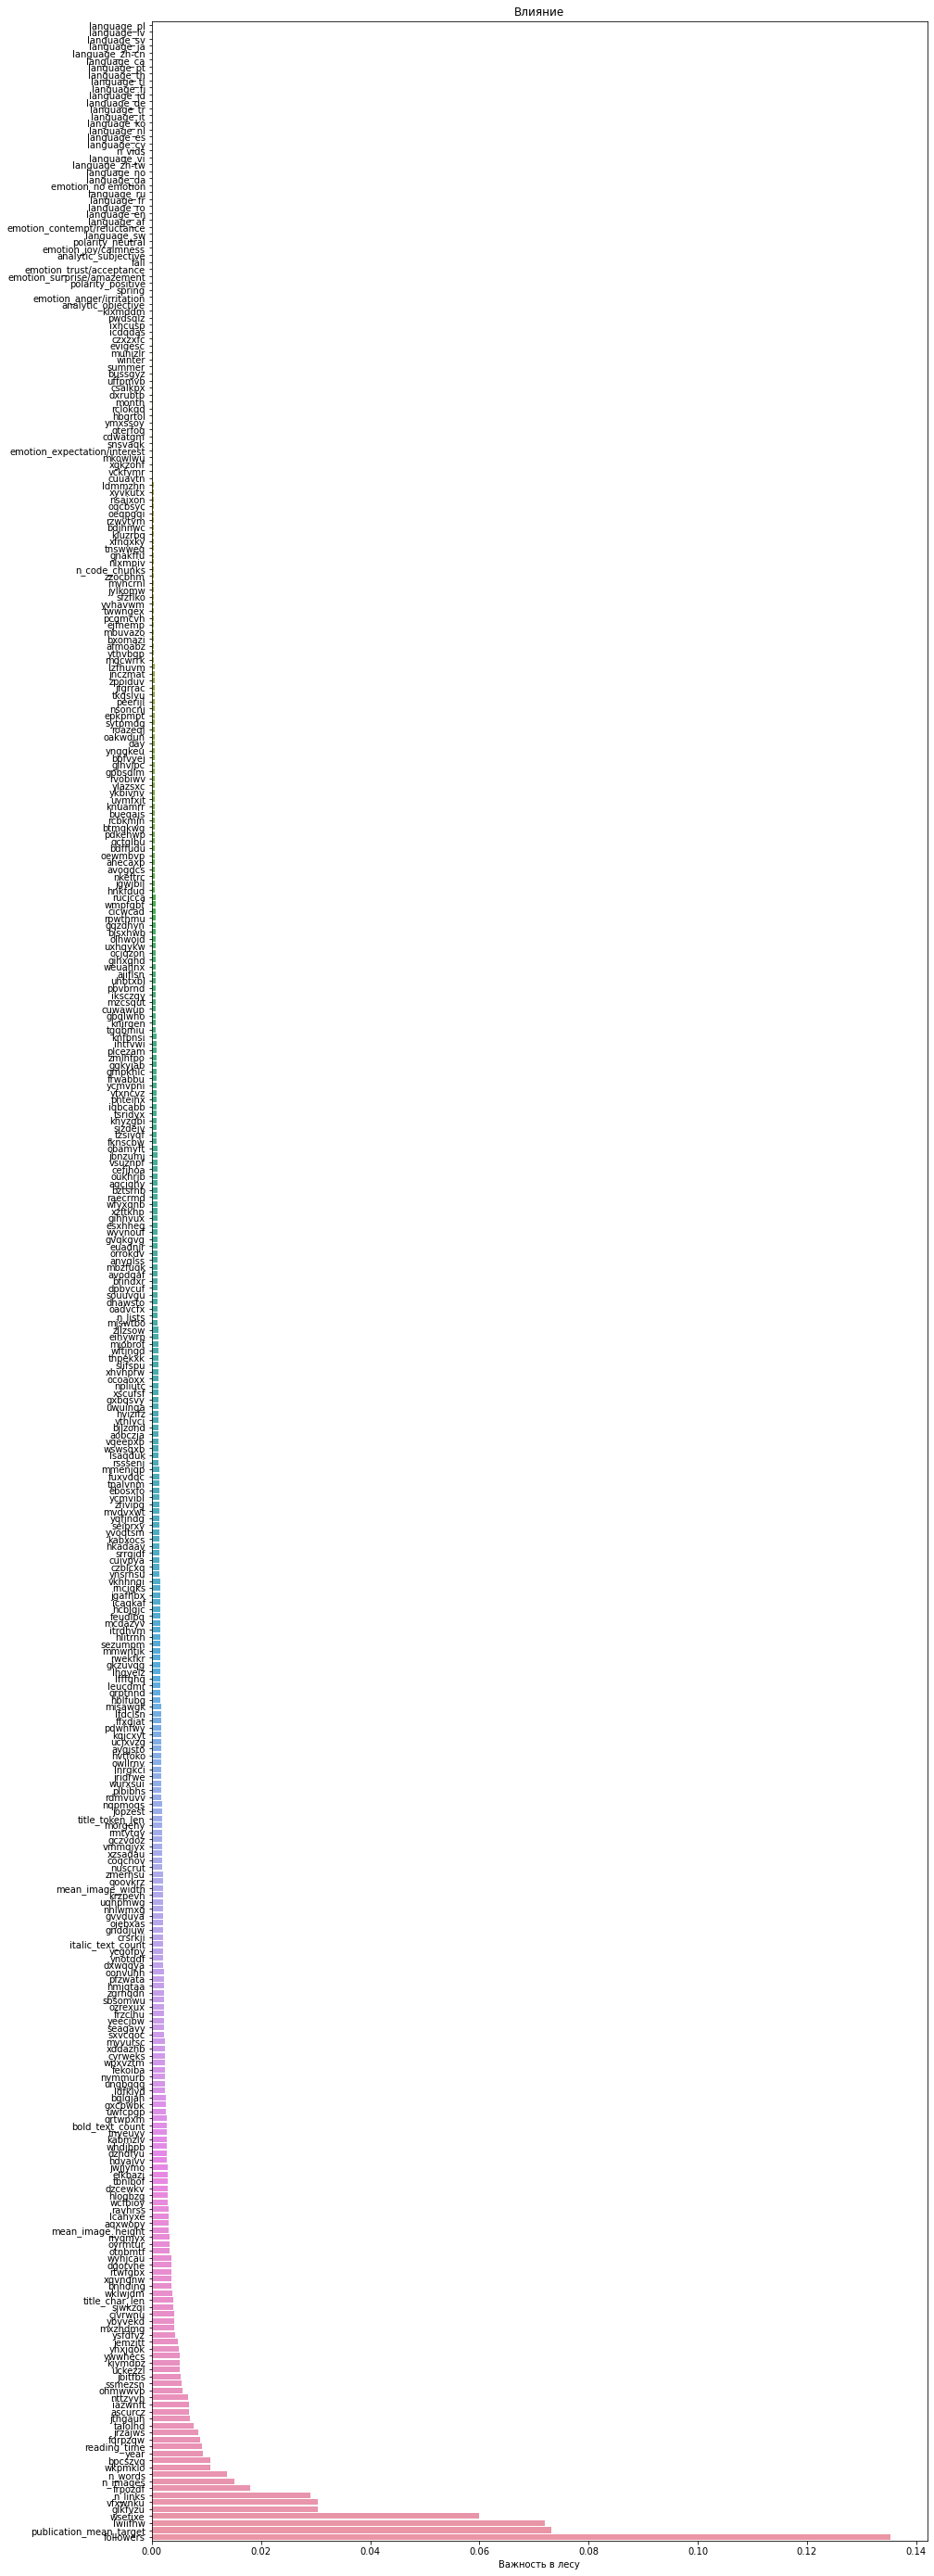

In [157]:
plt.figure(figsize=(15, 50))
inds = np.argsort(imps)
sns.barplot(x=np.asarray(imps)[inds], y=np.asarray(X_train.columns)[inds])
plt.xlabel('Важность в лесу')
plt.title('Влияние')

## Naive baseline

In [105]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error

naive_pred = pd.Series(np.mean(y_train)).repeat(len(y_train))
mean_absolute_error(y_train, naive_pred)

113.74913165109133

Create scaled dataset for benchmarking.

In [97]:
import matplotlib
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
model_features = set(X_train.select_dtypes(np.number).columns) - set(['year','month','day', 'day_of_week'])
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[model_features]), columns=model_features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[model_features]), columns=model_features)

## Lasso

https://stats.stackexchange.com/questions/367155/why-lasso-for-feature-selection

In [98]:
from sklearn.linear_model import LassoCV

lasso_alphas = 10**np.linspace(-5,0,1000)
lasso_cv = LassoCV(alphas = lasso_alphas, cv=5)
lasso_cv.fit(X_train_scaled, log(y_train))
lasso_cv.alpha_

/Users/collindching/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.007996554525892346

In [103]:
from sklearn.linear_model import Lasso
np.random.seed(4)

lasso = Lasso(alpha=lasso_cv.alpha_)
lasso_cv_log_mae = np.mean(-cross_val_score(lasso, X_train_scaled, log(y_train), scoring='neg_mean_absolute_error', cv=5))
lasso_cv_log_mae

3.0576655753799407

In [106]:
from sklearn.model_selection import cross_val_predict
np.random.seed(4)

lasso_cv_pred = np.exp(cross_val_predict(lasso, X_train_scaled, log(y_train), cv=5))
lasso_mae = mean_absolute_error(y_train, lasso_cv_pred)
lasso_mae

3010.5336951960394

In [663]:
lasso_cv_coefs = list(zip(model_features, lasso_cv.coef_/scaler.scale_))
lasso_features = [x[0] for x in lasso_cv_coefs if x[1] > 0]
len(lasso_features)

59

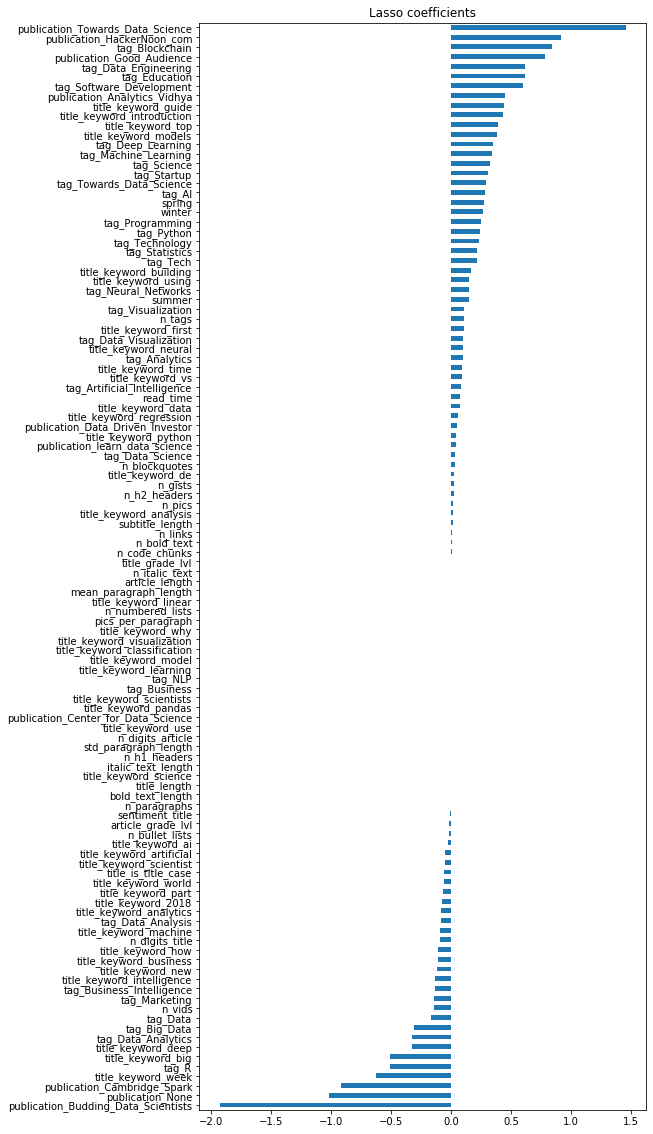

In [664]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in lasso_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Lasso coefficients");

## Ridge 

In [665]:
from sklearn.linear_model import RidgeCV

ridge_alphas = 10**np.linspace(0,4,200)
ridge_cv = RidgeCV(ridge_alphas, cv=5)
ridge_cv.fit(X_train_scaled, log(y_train))
ridge_cv.alpha_

651.7339604882427

In [666]:
from sklearn.linear_model import Ridge
np.random.seed(4)

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge_pred = np.exp(cross_val_predict(ridge, X_train_scaled, log(y_train), cv=5))
ridge_mae = mean_absolute_error(y_train, ridge_pred)
ridge_mae

3085.110371699255

In [667]:
ridge_cv_coefs = list(zip(model_features, ridge_cv.coef_/scaler.scale_))
ridge_features = [x[0] for x in ridge_cv_coefs if x[1] > 0]
len(ridge_features)

68

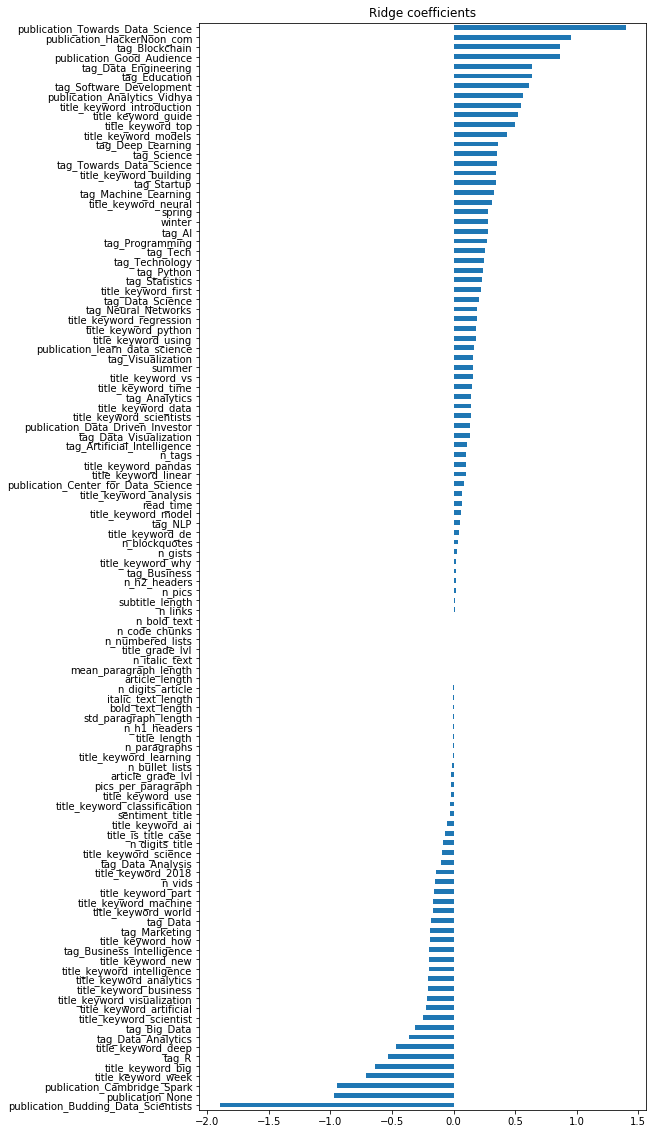

In [668]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in ridge_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Ridge coefficients");

## ElasticNet

In [669]:
from sklearn.linear_model import ElasticNetCV
np.random.seed(4)

en_alpha = 10**np.linspace(-5,0,100)
en_lambda = np.linspace(0 + 1/200,1,200)
en_cv = ElasticNetCV(l1_ratio = en_lambda, n_alphas = 100, cv=5)
en_cv.fit(X_train_scaled, log(y_train))

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 , 0.235, 0.24 , 0...
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995, 1.   ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [670]:
from sklearn.linear_model import ElasticNet
np.random.seed(4)

en = ElasticNet(en_cv.alpha_, en_cv.l1_ratio_)
en_pred = np.exp(cross_val_predict(en, X_train_scaled, log(y_train), cv=5))
en_mae = mean_absolute_error(y_train, en_pred)
en_mae

2873.7701825654203

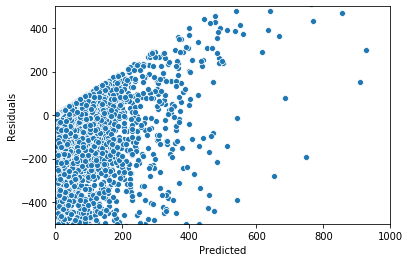

In [682]:
plt.figure(figsize=(6,4))

en_residuals = en_pred - y_train
sns.scatterplot(en_pred, en_residuals)
plt.xlim(0,1000)
plt.ylim(-500,500)
plt.ylabel('Residuals');
plt.xlabel('Predicted');

In [227]:
en_cv_coefs = list(zip(model_features, en_cv.coef_/scaler.scale_))
en_features = [x[0] for x in en_cv_coefs if x[1] > 0]
len(en_features)

62

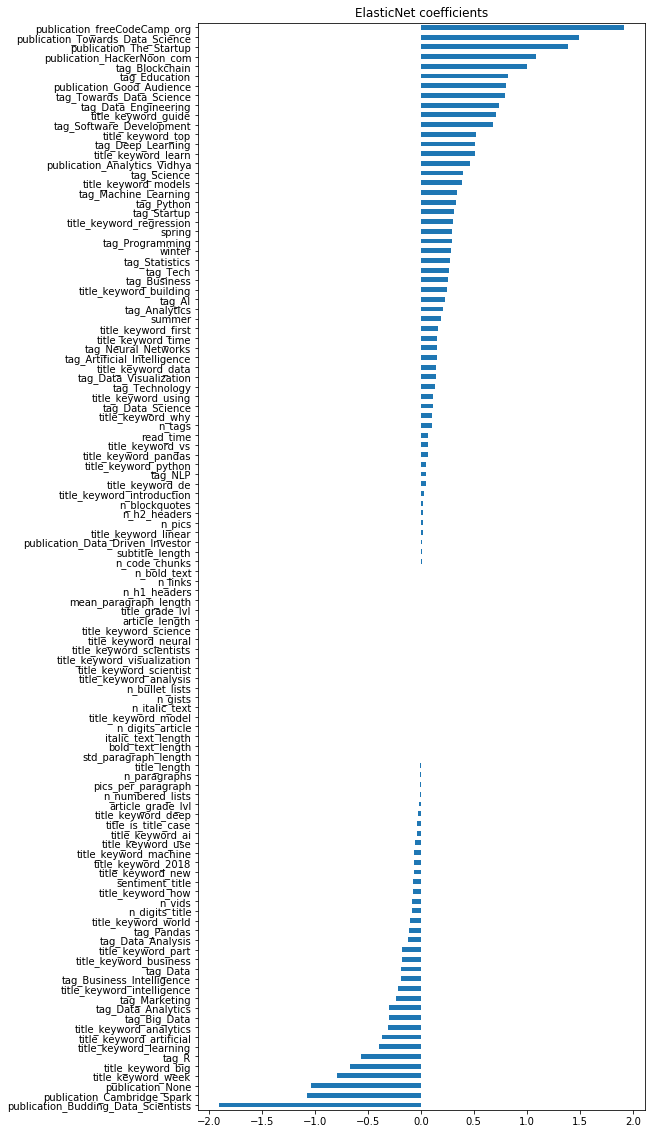

In [226]:
plt.figure(figsize=(8,20))
coef = pd.Series([x[1] for x in en_cv_coefs], index=model_features)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("ElasticNet coefficients");

Not only does ElasticNet outperforms the other two models in terms of mean absolute error, and also does a fair job at simplifying the model. 

# StatsModel from Lasso

In [999]:
'day_of_week' in lasso_cv_features

False

In [1007]:
data_sm = pd.concat([np.log(y_train+1), X_train[lasso_cv_features]], axis=1)    
data_sm[lasso_cv_features] = scaler.fit_transform(data_sm[lasso_cv_features])

formula = build_formula('n_claps', lasso_cv_features)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     135.2
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:06:25   Log-Likelihood:                -22482.
No. Observations:               11012   AIC:                         4.507e+04
Df Residuals:                   10961   BIC:                         4.544e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# Check again

In [1008]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(lasso_cv.alpha_)
lasso_model.fit(X_train_scaled[lasso_cv_features], np.log(y_train+1))

Lasso(alpha=0.00897331581458352, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1010]:
y_pred = lasso_model.predict(X_test_scaled[lasso_cv_features])

In [1011]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [1013]:
mae(y_test, np.exp(y_pred))

187.34033016944994

In [1014]:
res = y_test - y_pred

Text(0, 0.5, 'Residuals')

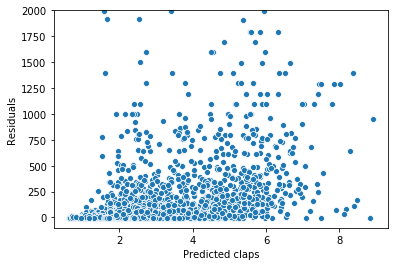

In [1018]:
sns.scatterplot(y_pred, res)
plt.ylim(-100,2000)
plt.xlabel('Predicted claps')
plt.ylabel('Residuals')

In [ ]:
lasso_model.fit(X_)

In [609]:
list(zip(X_train_scaled.columns, lasso_model.coef_))

[('tag_Data', -0.038896233045591165),
 ('publication_Coinmonks', 0.04666639683257522),
 ('title_keyword_2018', -0.013924547769326058),
 ('tag_Data_Scientist', -0.5684984769198934),
 ('tag_Mathematics', 0.004711036658239982),
 ('publication_None', 0.08009516403386471),
 ('title_keyword_model', -0.029328562518994444),
 ('title_keyword_python', 0.05078579659286101),
 ('title_keyword_neural', 0.12002601464813924),
 ('tag_Fintech', -0.03203655171293014),
 ('n_h1_headers', 0.10341034901999664),
 ('title_keyword_deep', 0.03575554383278275),
 ('tag_Software_Development', 0.05897803274174943),
 ('tag_Data_Analytics', 0.04440854141137652),
 ('tag_Technology', -0.012587420715543508),
 ('sentiment_title', 0.06888267871050249),
 ('tag_Deep_Learning', -0.004475011184317516),
 ('title_keyword_week', 0.0324709857384439),
 ('tag_Design', 0.03359648894986356),
 ('article_grade_lvl', -0.0015300452686747596),
 ('tag_Healthcare', 0.03525152813410954),
 ('publication_Analytics_Vidhya', 0.12192100228540728),

In [610]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(ridge_modelCV.alpha_)
ridge_model.fit(X_train_scaled[filtered_features_2], np.log(y_train+1))

Ridge(alpha=573.8441648302393, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [611]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [612]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [614]:
print(np.mean(cross_val_score(ridge_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lasso_model, X_train_scaled[filtered_features_2], np.log(y_train+1), cv=kf, scoring='r2')))

0.3979215072204026
0.3973000101013735


In [624]:
data_sm = pd.concat([np.log(y_train+1), X_train[model_features]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:00:58   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [623]:
data_sm = pd.concat([np.log(y_train+1), X_train[filtered_features_2]], axis=1)
formula = build_formula('n_claps', filtered_features_2)
mod = smf.ols(formula, data_sm)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                n_claps   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     98.16
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:58:03   Log-Likelihood:                -22124.
No. Observations:               10981   AIC:                         4.441e+04
Df Residuals:                   10902   BIC:                         4.498e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Build residuals plot

# Predict on test data w best model

In [634]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [635]:
y_pred = ridge_modelCV.predict(X_test_scaled)

In [636]:
X_test_scaled

,tag_Data,publication_Coinmonks,title_keyword_2018,tag_Data_Scientist,tag_Mathematics,publication_None,title_keyword_model,title_keyword_python,title_keyword_neural,tag_Fintech,n_h1_headers,title_keyword_deep,tag_Software_Development,tag_Data_Analytics,tag_Technology,sentiment_title,tag_Deep_Learning,title_keyword_week,tag_Design,article_grade_lvl,tag_Healthcare,publication_Analytics_Vidhya,tag_Science,title_keyword_business,title_keyword_pandas,tag_Artificial_Intelligence,read_time,title_keyword_ai,tag_Web_Development,tag_Data_Visualization,title_keyword_analytics,title_keyword_intelligence,tuesday,title_keyword_new,winter,tag_Education,tag_Visualization,title_keyword_data,spring,tag_Privacy,title_keyword_de,n_gists,n_tags,title_is_title_case,tag_Data_Analysis,title_keyword_using,tag_Business,article_length,summer,tag_Data_Science,tag_Analytics,tag_Neural_Networks,n_code_chunks,n_blockquotes,title_grade_lvl,tag_Startup,title_keyword_linear,title_keyword_analysis,tag_Business_Intelligence,tag_Blockchain,publication_Data_Driven_Investor,tag_Finance,tag_Computer_Vision,subtitle_length,title_keyword_learning,publication_Cambridge_Spark,n_digits_title,title_keyword_part,title_keyword_building,tag_Marketing,tag_AI,title_keyword_why,title_keyword_machine,tag_Politics,tag_Statistics,tag_Tech,title_keyword_big,mean_paragraph_length,n_h2_headers,tag_Towards_Data_Science,n_vids,tag_Kaggle,tag_Engineering,title_length,publication_Good_Audience,n_bullet_lists,title_keyword_scientist,title_keyword_guide,tag_Learning,title_keyword_regression,title_keyword_artificial,tag_Algorithms,tag_Programming,title_keyword_introduction,n_numbered_lists,tag_Machine_Learning,wednesday,tag_Computer_Science,n_pics,tag_Coding,title_keyword_how,tag_Data_Engineering,tag_Big_Data,n_digits_paragraph,tag_Careers,tag_R,n_paragraphs,publication_HackerNoon_com,publication_freeCodeCamp_org,tag_Linear_Regression,publication_Towards_Data_Science,n_italic_text,title_keyword_science,tag_Python,tag_Pandas,tag_NLP,n_bold_text,tag_Cryptocurrency,publication_Center_for_Data_Science,n_links
0,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,-0.987241,-0.102423,-0.049647,-0.027001,-0.09292,-0.066634,-0.05573,-0.117284,-0.11405,-0.241047,-1.261992,-0.301137,-0.054061,-0.100129,0.496970,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,1.704665,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,-0.418260,-0.103169,-0.481046,1.051118,-0.292418,-0.176569,-0.130904,2.016915,-0.600318,0.038199,-0.265680,-0.134107,-0.297362,-0.328669,-0.784284,-0.144960,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,-0.125398,-0.27017,-0.068978,-0.100592,-0.098256,4.238568,-0.143314,-0.071595,-0.279228,0.968077,-0.186472,-0.170236,-0.094894,-0.085667,0.101438,-0.061219,-0.416042,-0.087798,-0.063427,-0.11405,-0.045814,-0.02864,-0.105995,-0.216117,-0.043773,-0.329896,1.241258,-0.459596,-0.114459,0.553437,-0.098256,-0.086739,-0.115273,-0.287249,2.788842,-0.091918,-0.160569,2.058784,-0.100129,-0.072869,-0.093912,-0.420811,-0.164966,-0.145614,-0.380693,-0.111147,-0.154497,0.462348,-0.111566,-0.059701,-0.471528
1,-0.324133,-0.058928,-0.17739,-0.105555,-0.110726,1.012924,-0.102423,-0.049647,-0.027001,-0.09292,-0.598781,-0.05573,-0.117284,-0.11405,-0.241047,1.069804,-0.301137,-0.054061,-0.100129,-1.005516,-0.094894,-0.065563,-0.123131,-0.061963,-0.05234,-0.430215,-0.870940,-0.249189,-0.085667,-0.286877,-0.0627,-0.042716,-0.427984,-0.08727,-0.531815,-0.147236,-0.113228,-0.273647,-0.556137,-0.097783,2.390859,-0.103169,0.066917,1.051118,-0.292418,-0.176569,-0.130904,-0.843931,1.665784,0.038199,3.763924,-0.134107,-0.297362,-0.328669,0.162133,6.898442,-0.034428,-0.090905,-0.1124,-0.146589,-0.145287,-0.089881,-0.089881,-0.305652,-0.136549,-0.060465,-0.382838,-0.081807,-0.041632,7.974592,-0.27017,-0.068978,-0.100592,-0.098256,-0.235929,-0.143314,-0.071

In [637]:
mae(y_test, np.exp(test_set_pred_ridge))

196.4144283234578

In [645]:
residuals = y_test - np.exp(y_pred)

(-10000, 10000)

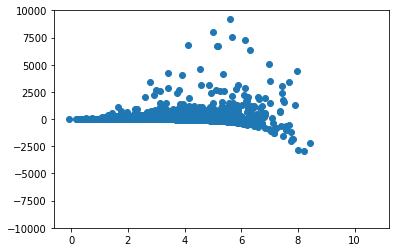

In [649]:
plt.scatter(y_pred,residuals)
plt.ylim(-10000,10000)

(0, 2500)

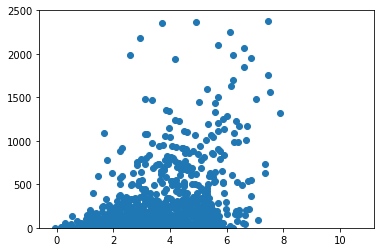

In [650]:
plt.scatter(test_set_pred_ridge,residuals)
plt.ylim(0,2500)

In [644]:
residuals

10082     61.433317
6308      43.263430
12185      7.877115
11442    184.603794
201       13.676543
            ...    
13416     57.132903
3563      -0.806254
13801     -0.565999
1993       5.454524
12834     -1.265824
Name: n_claps, Length: 2741, dtype: float64

In [1]:
import tsai

In [2]:
from tsai.all import *
X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)

c:\Users\Aleksey\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Aleksey\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")
119it [00:07, 15.39it/s]
66it [00:03, 19.50it/s] 


In [3]:
X.shape

(137, 24, 144)

In [4]:
X[:,:,0]

memmap([[21.29      , 31.66666667, 19.89      , ...,  7.        ,
         40.        , -4.2       ],
        [21.6       , 39.11      , 20.        , ...,  4.        ,
         40.        ,  1.1       ],
        [19.6       , 45.09      , 18.79      , ...,  2.        ,
         40.        ,  1.8       ],
        ...,
        [20.        , 39.29      , 18.6       , ...,  3.        ,
         40.        , -0.9       ],
        [20.06666667, 42.83333333, 19.        , ...,  7.        ,
         29.        ,  2.3       ],
        [24.39      , 39.09      , 23.89      , ...,  4.        ,
         40.        ,  7.8       ]])

In [5]:
X

memmap([[[ 2.12900000e+01,  2.12900000e+01,  2.12900000e+01, ...,
           2.17900000e+01,  2.17900000e+01,  2.17900000e+01],
         [ 3.16666667e+01,  3.19266667e+01,  3.20600000e+01, ...,
           3.36600000e+01,  3.37000000e+01,  3.35666667e+01],
         [ 1.98900000e+01,  1.98233333e+01,  1.97900000e+01, ...,
           1.97900000e+01,  1.97900000e+01,  1.97900000e+01],
         ...,
         [ 7.00000000e+00,  6.83333333e+00,  6.66666667e+00, ...,
           5.00000000e+00,  5.00000000e+00,  5.00000000e+00],
         [ 4.00000000e+01,  4.00000000e+01,  4.00000000e+01, ...,
           4.00000000e+01,  4.00000000e+01,  4.00000000e+01],
         [-4.20000000e+00, -4.16666667e+00, -4.13333333e+00, ...,
          -4.30000000e+00, -4.16666667e+00, -4.03333333e+00]],

        [[ 2.16000000e+01,  2.17000000e+01,  2.16571429e+01, ...,
           2.08900000e+01,  2.08900000e+01,  2.09214286e+01],
         [ 3.91100000e+01,  3.92833333e+01,  4.08128571e+01, ...,
           3.87642857e

In [ ]:
batch_tfms = TSStandardize(by_sample=True)
reg = TSRegressor(X, y, splits=splits, path='models', arch=TSTPlus, batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(100, 3e-4)
reg.export("reg.pkl")